In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('University SAT, GPA and Attendance.csv')
df.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [3]:
data = df.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [4]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [5]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           2.19e-15
Time:                        18:29:58   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

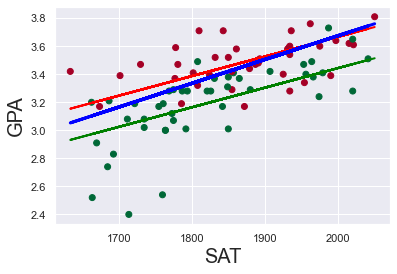

In [6]:
plt.scatter(data['SAT'],y, c=data['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']   #For attendance NO. We take just const value
yhat_yes = 0.8665 + 0.0014*data['SAT']  #For attendance YES. We take const+Attendance values from OLS
yhat = 0.0017*data['SAT'] + 0.275       # Original regression line

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='green')                          # Attendance less than 75% regression line
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='red')                           # Attendance more than 75% regression line
fig = plt.plot(data['SAT'],yhat, lw=3, c='blue', label ='regression line') # The original regression line
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()